# Візуалізація кривої з програми

Виводить криву з `predict_curve.txt`

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Load curve from program
curve = np.loadtxt('experiments/experiment3.txt')
print(f"Loaded {len(curve)} points")
print(f"Min: {curve.min():.4e}")
print(f"Max: {curve.max():.4e}")
print(f"Peak position: {np.argmax(curve)}")

Loaded 815 points
Min: 1.3596e-04
Max: 6.8463e-02
Peak position: 67


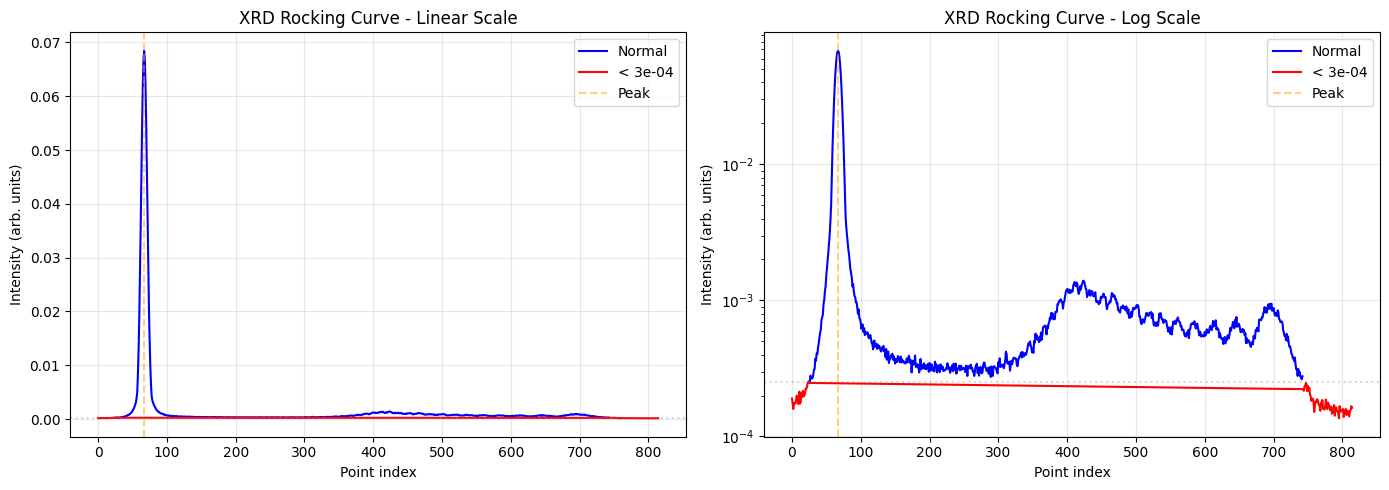

Points below 3e-04: 96 (11.8%)


In [64]:
# Plot curve with threshold coloring
THRESHOLD = 0.00025

# Find points below threshold
mask_low = curve < THRESHOLD
mask_high = curve >= THRESHOLD

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
x = np.arange(len(curve))
axes[0].plot(x[mask_high], curve[mask_high], 'b-', linewidth=1.5, label='Normal')
axes[0].plot(x[mask_low], curve[mask_low], 'r-', linewidth=1.5, label=f'< {THRESHOLD:.0e}')
axes[0].axvline(x=np.argmax(curve), color='orange', linestyle='--', alpha=0.5, label='Peak')
axes[0].axhline(y=THRESHOLD, color='gray', linestyle=':', alpha=0.3)
axes[0].set_xlabel('Point index')
axes[0].set_ylabel('Intensity (arb. units)')
axes[0].set_title('XRD Rocking Curve - Linear Scale')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Log scale
axes[1].semilogy(x[mask_high], curve[mask_high], 'b-', linewidth=1.5, label='Normal')
axes[1].semilogy(x[mask_low], curve[mask_low], 'r-', linewidth=1.5, label=f'< {THRESHOLD:.0e}')
axes[1].axvline(x=np.argmax(curve), color='orange', linestyle='--', alpha=0.5, label='Peak')
axes[1].axhline(y=THRESHOLD, color='gray', linestyle=':', alpha=0.3)
axes[1].set_xlabel('Point index')
axes[1].set_ylabel('Intensity (arb. units)')
axes[1].set_title('XRD Rocking Curve - Log Scale')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Count points below threshold
n_low = mask_low.sum()
print(f"Points below {THRESHOLD:.0e}: {n_low} ({n_low/len(curve)*100:.1f}%)")

In [65]:
# Show first and last 10 points
print("First 10 points:")
print(curve[:10])
print("\nLast 10 points:")
print(curve[-10:])

First 10 points:
[0.00019024 0.00017784 0.00015923 0.00017474 0.00017629 0.00017474
 0.00018404 0.00019955 0.00019024 0.00017318]

Last 10 points:
[0.00015923 0.00014372 0.00015457 0.00015147 0.00015302 0.00014062
 0.00015302 0.00015613 0.00016698 0.00016233]


In [66]:
# Stats
print(f"Total points: {len(curve)}")
print(f"Peak position: index {np.argmax(curve)}")
print(f"Peak intensity: {curve.max():.6e}")
print(f"Min intensity: {curve.min():.6e}")
print(f"Mean intensity: {curve.mean():.6e}")
print(f"Std intensity: {curve.std():.6e}")

Total points: 815
Peak position: index 67
Peak intensity: 6.846289e-02
Min intensity: 1.359646e-04
Mean intensity: 1.502088e-03
Std intensity: 6.605473e-03
